In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
data = pd.read_csv('WVS_Cross-National_Inverted_Wave_7_csv_v5_0.csv')

C:\Users\thome\AppData\Local\Temp/ipykernel_37524/2512183436.py:1: DtypeWarning: Columns (0,1,532,533,534) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WVS_Cross-National_Inverted_Wave_7_csv_v5_0.csv')


In [3]:
data.head()

version                       doi  A_WAVE  A_YEAR  A_STUDY  \
0  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
1  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
2  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
3  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
4  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0         20             AND        232         AND     20070001  ...   
1         20             AND        232         AND     20070002  ...   
2         20             AND        232         AND     20070003  ...   
3         20             AND        232         AND     20070004  ...   
4         20             AND        232         AND     20070005  ...   

   WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
0                   62.434211              -999.0                  -999.0   
1                   62.434211              -999.0                  -999.0   
2                   62.434211              -999.0                  -999.0   
3                         NaN                 NaN                     NaN   
4                   66.964286              -999.0                  -999.0   

   v2psbars  v2psorgs  v2psprbrch  v2psprlnks  v2psplats  v2xnp_client  \
0    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
1    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
2    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
3       NaN       NaN         NaN         NaN        NaN           NaN   
4    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   

   v2xps_party  
0       -999.0  
1       -999.0  
2       -999.0  
3          NaN  
4       -999.0  

[5 rows x 564 columns]

In [4]:
data["Q1P"]

0        4
1        4
2        4
3        4
4        4
        ..
94273    4
94274    4
94275    4
94276    4
94277    4
Name: Q1P, Length: 94278, dtype: int64

In [5]:
data.iloc[10]

version               1-5-0 (2020-11-16)
doi             doi.org/10.14281/18241.1
A_WAVE                                 7
A_YEAR                              2018
A_STUDY                                2
                          ...           
v2psprbrch                           NaN
v2psprlnks                           NaN
v2psplats                            NaN
v2xnp_client                         NaN
v2xps_party                          NaN
Name: 10, Length: 564, dtype: object

In [6]:
data.loc[1:10, "Q1P"]

1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     3
9     4
10    4
Name: Q1P, dtype: int64

In [7]:
selected_vars = ['Q1P', 'Q2P']
data[selected_vars]

Q1P  Q2P
0        4    4
1        4    4
2        4    3
3        4    4
4        4    4
...    ...  ...
94273    4    4
94274    4    4
94275    4    4
94276    4    4
94277    4    4

[94278 rows x 2 columns]

In [8]:
ARG_data = data[data['B_COUNTRY'] == 32]
ARG_data.head()

version                       doi  A_WAVE  A_YEAR  A_STUDY  \
1004  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1005  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1006  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1007  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1008  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   

      B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
1004         32             ARG        160         ARG     32070001  ...   
1005         32             ARG        160         ARG     32070002  ...   
1006         32             ARG        160         ARG     32070003  ...   
1007         32             ARG        160         ARG     32070004  ...   
1008         32             ARG        160         ARG     32070005  ...   

      WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
1004                         NaN                 NaN                     NaN   
1005                   78.042302             -999.00               -999.0000   
1006                   78.042302             -999.00               -999.0000   
1007                   74.439437                5.65                  6.5125   
1008                         NaN                 NaN                     NaN   

      v2psbars  v2psorgs  v2psprbrch  v2psprlnks  v2psplats  v2xnp_client  \
1004       NaN       NaN         NaN         NaN        NaN           NaN   
1005  -999.000  -999.000    -999.000    -999.000   -999.000      -999.000   
1006  -999.000  -999.000    -999.000    -999.000   -999.000      -999.000   
1007     2.407     1.581       1.502       0.428      0.938         0.459   
1008       NaN       NaN         NaN         NaN        NaN           NaN   

      v2xps_party  
1004          NaN  
1005     -999.000  
1006     -999.000  
1007        0.729  
1008          NaN  

[5 rows x 564 columns]

In [9]:
print(data['Q2P'].mean())
print(data['Q2P'].var())
print(data['Q2P'].std())

3.274008782536753
0.6655762393883811
0.815828560047012


In [10]:
columns = data.columns
print(columns)

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=564)


In [11]:
sel_vars = ['B_COUNTRY'] + columns[38:299].tolist()
data1 = data[sel_vars].copy()

In [12]:
data1.replace([-1,-2,-3,-4,-5], np.nan, inplace = True)

In [13]:
print(data1['Q2P'].mean())
print(data1['Q2P'].var())
print(data1['Q2P'].std())

3.2928376092022518
0.5487902123391195
0.7408037610184761


In [14]:
covariance = data1.iloc[:,1:].cov()
correlation = data1.iloc[:,1:].corr()

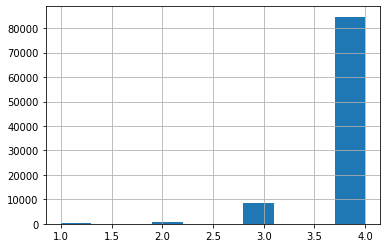

In [15]:
data1['Q1P'].hist()
plt.show()

In [16]:
country_data = data1.groupby('B_COUNTRY').mean()

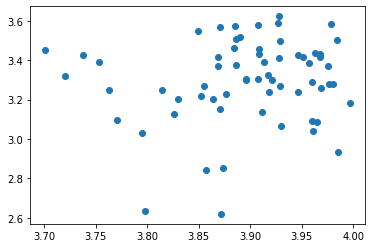

In [17]:
x = country_data['Q1P']
y = country_data['Q2P']
plt.scatter(x, y)
plt.show()

# PCA

In [18]:
X1 = country_data.loc[country_data.isna().sum(axis = 1) == 0] #select complete rows
X2 = country_data.T[country_data.isna().sum(axis = 0) == 0].T #select complete columns

In [19]:
# Label the rows. 
labels = pd.read_csv('country_labels.csv')
labels.columns = ['name', 'id']
country_data.index = labels.name
country_data.head()

Q1P       Q2P       Q3P       Q4P       Q5P       Q6P  \
name                                                                     
Andorra     3.884462  3.464143  3.578685  2.059880  3.474052  2.034930   
Argentina   3.908275  3.458624  3.190190  2.192807  3.531595  2.606061   
Australia   3.889628  3.520385  3.353645  2.588168  3.004608  2.102273   
Bangladesh  3.985000  2.931438  2.808242  1.923671  3.777406  3.932331   
Armenia     3.946852  3.238953  3.096854  2.287829  3.655738  3.600492   

                 Q7P       Q8P       Q9P      Q10P  ...      Q249      Q250  \
name                                                ...                       
Andorra     0.848606  0.468127  0.440239  0.736056  ...  9.004008  9.112662   
Argentina   0.783649  0.342971  0.566301  0.705882  ...  8.700916  8.879676   
Australia   0.822945  0.520132  0.437948  0.569222  ...  8.906090  9.055524   
Bangladesh  0.983333  0.328333  0.515833  0.675000  ...  8.892500  8.112500   
Armenia     0.679803  0.191297  0.720854  0.765189  ...  8.638655  8.928870   

                Q251      Q252     Q253P     Q254P     Q255P     Q256P  \
name                                                                     
Andorra     6.611222  5.779000  3.219219  4.263210  3.401795  3.375250   
Argentina   7.005066  5.412361  2.495298  3.485887  3.404234  3.285714   
Australia   7.410431  5.740471  3.087827  3.579094  3.170691  3.079392   
Bangladesh  7.234167  6.762500  3.086842  3.813178  3.798999  3.497500   
Armenia     5.096469  4.030988  2.156355  3.795211  3.612983  3.362355   

               Q257P     Q258P  
name                            
Andorra     3.309761  2.887450  
Argentina   3.152130  2.709110  
Australia   3.371557  2.349008  
Bangladesh  3.282481  2.298467  
Armenia     3.525144  2.178261  

[5 rows x 261 columns]

In [20]:
# Mean-center and standardize a matrix. 
X2_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X2)

In [21]:
# Print the column means and varianes. 
print(X2_ctd_std.mean(axis = 0))
print(X2_ctd_std.var(axis = 0))

[ 8.22952817e-15  4.02455846e-16  6.03683770e-16 -4.02455846e-16
 -3.74700271e-16 -1.45716772e-16 -8.32667268e-17  4.85722573e-17
  5.96744876e-16 -4.99600361e-16  1.59594560e-16 -6.67868538e-16
 -1.45716772e-16 -6.93889390e-17 -2.77555756e-17  4.92661467e-16
 -2.77555756e-17 -3.15719673e-16 -9.02056208e-17  4.16333634e-17
  1.31838984e-16  1.66533454e-16  1.38777878e-17  4.16333634e-17
  7.00828284e-16  1.66533454e-16  7.77156117e-16 -1.38777878e-16
  8.74300632e-16 -2.63677968e-16  0.00000000e+00 -1.38777878e-17
  9.71445147e-17  3.67761377e-16 -6.86950496e-16 -1.94289029e-16
  5.75928194e-16 -1.13797860e-15  1.17961196e-16  1.38777878e-17
 -1.35308431e-15 -7.00828284e-16 -3.71230824e-16 -1.52655666e-16
  1.94289029e-16 -3.53883589e-16  6.86950496e-16  2.70616862e-16
 -4.23272528e-16  1.66533454e-16  2.28983499e-16 -3.74700271e-16
 -1.44328993e-15 -7.35522754e-16 -9.15933995e-16  1.38777878e-16
 -1.08246745e-15 -6.93889390e-18 -2.08166817e-17  1.11022302e-16
 -6.90419943e-16 -1.52655

In [22]:
#Perform pca on the scaled matrix. 
model = PCA(svd_solver = 'full')
scores = model.fit_transform(X2_ctd_std)

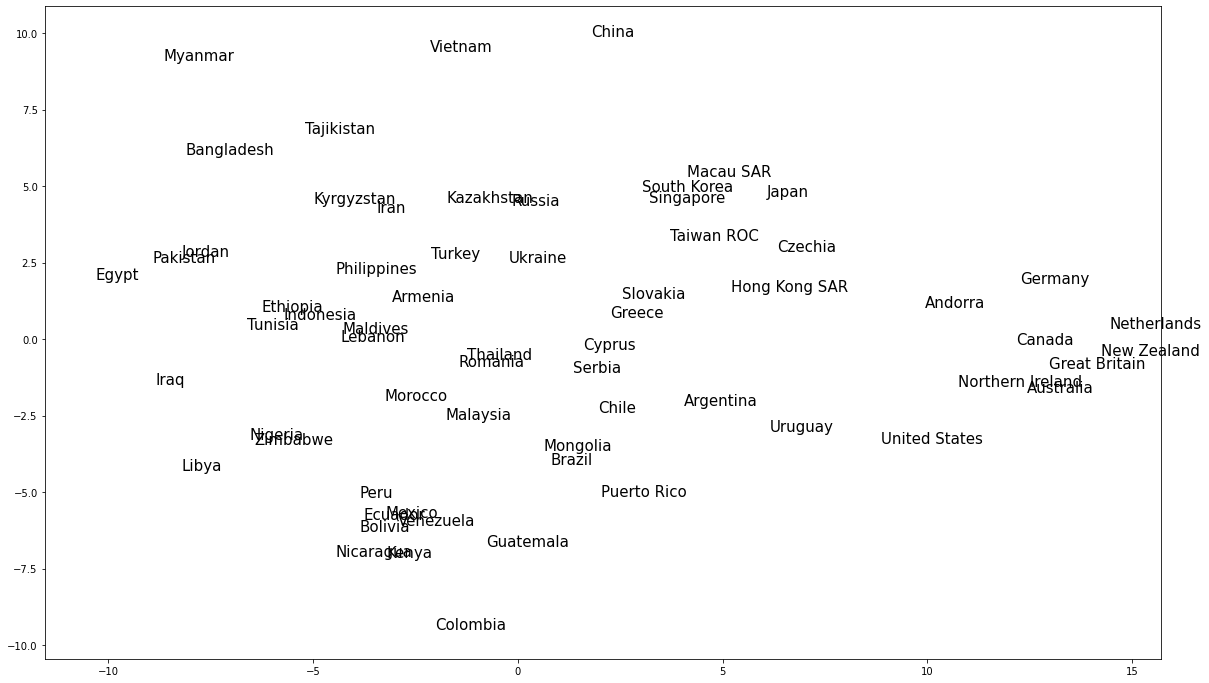

In [23]:
# Produce a rsample plot.
fig = plt.figure(figsize = [20,12])
y1 = scores[:,0]
y2 = scores[:,1]
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(labels.name):
    plt.text(y1[i], y2[i], country, size = 15)
plt.show()

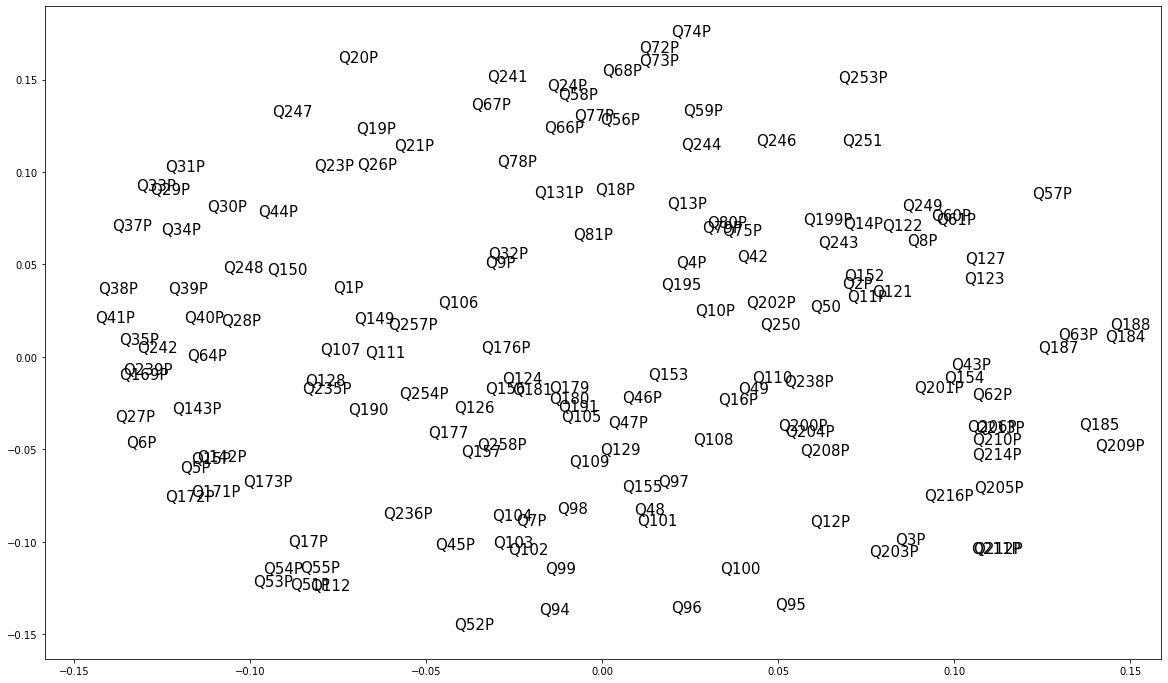

In [24]:
# Produce a variable plot.
fig = plt.figure(figsize = [20,12])
loadings = model.components_
y1_var = loadings[0,:]
y2_var = loadings[1,:]
plt.scatter(y1_var,y2_var, alpha = 0)
for i, var in enumerate(X2.columns):
    plt.text(y1_var[i], y2_var[i], var, size = 15)
plt.show()

In [25]:
# Produce a biplot. You need to properly scale the two plots so that they align with each other. There are different versions for scaling biplots. Here is one way. 
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 1)

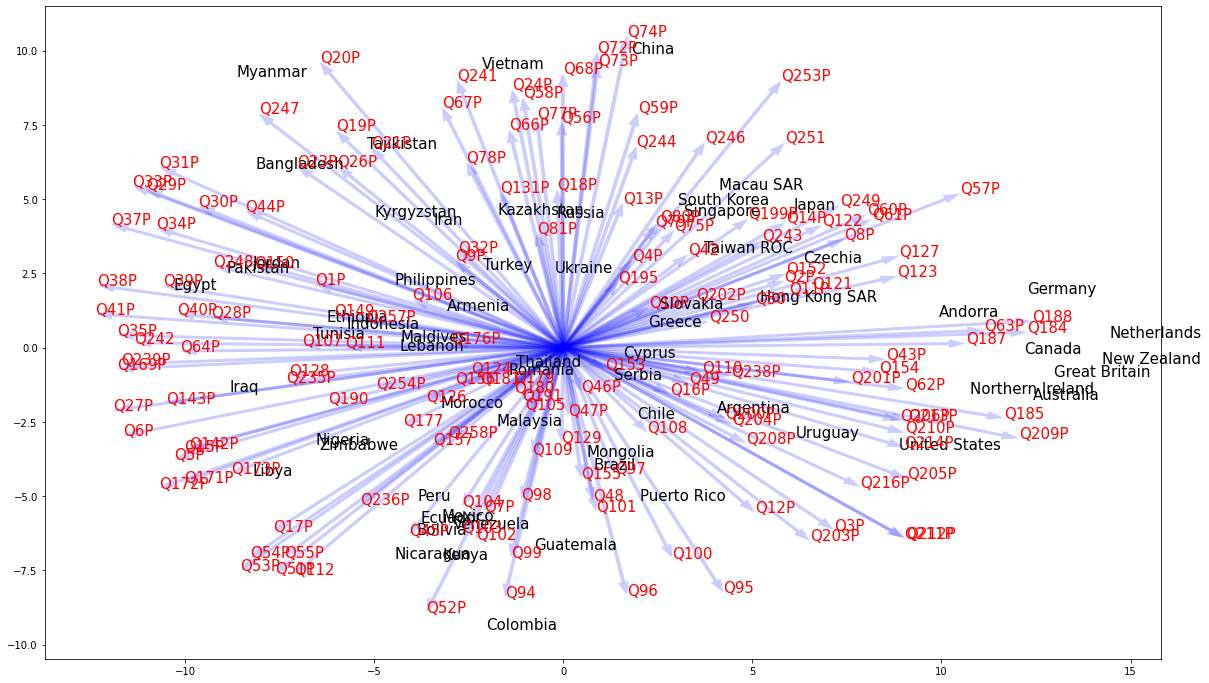

In [26]:
fig = plt.figure(figsize = [20,12])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(labels.name):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X2.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Getting the eigenvalues is a bit tricky. Sklearn's pca model only gives you the singular values. You have to calculate the eigenvalues through a conversion. Recall that eigenvalues = singular values$^2$/n.

In [30]:
s = model.singular_values_
eigenvalues = s ** 2 / (X2_ctd_std.shape[0])
eigenvalues #PCA's solutions are unique. You should be able to get the same eigenvalues as you would obtain from R. 

array([4.00128206e+01, 1.79199968e+01, 1.54552268e+01, 1.04875325e+01,
       7.43637803e+00, 5.02978545e+00, 4.76494864e+00, 4.26478879e+00,
       3.88238772e+00, 3.65840392e+00, 3.28570343e+00, 2.92210819e+00,
       2.72117490e+00, 2.64595711e+00, 2.37212037e+00, 2.25964390e+00,
       2.06151501e+00, 1.97129934e+00, 1.84970333e+00, 1.66965804e+00,
       1.61728023e+00, 1.40920440e+00, 1.37225708e+00, 1.28641574e+00,
       1.25190742e+00, 1.19207782e+00, 1.10732441e+00, 1.01623401e+00,
       9.76471339e-01, 9.51169249e-01, 8.59722086e-01, 8.49523671e-01,
       7.92108434e-01, 7.45816010e-01, 6.58419116e-01, 6.50408533e-01,
       5.85829405e-01, 5.60103163e-01, 5.13949700e-01, 4.92213307e-01,
       4.79616865e-01, 4.34148790e-01, 4.04988120e-01, 3.97136211e-01,
       3.83730966e-01, 3.67593357e-01, 3.35505105e-01, 3.14188355e-01,
       2.82369113e-01, 2.67378384e-01, 2.41587493e-01, 2.23466313e-01,
       1.93805227e-01, 1.72473458e-01, 1.58781870e-01, 1.49562059e-01,
      

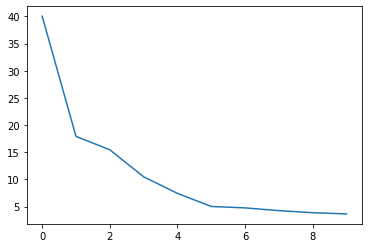

In [29]:
# Plot the eigenvalues of the first ten dimensions.
plt.plot(eigenvalues[:10])

# A 2D-demo of PCA

In this example, we only use two varaiables from the World Value Survey, Q184 and Q188 respectively.

In [254]:
X = country_data[['Q184', 'Q188']]

We can see that these two variables are highly correlated. 

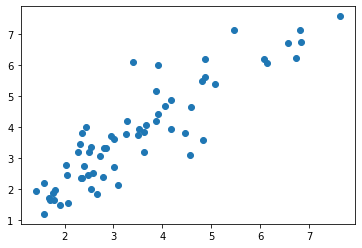

In [255]:
plt.scatter(X.Q184, X.Q188)

Let's perform PCA and see what will happend. 

In [256]:
X_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X)

In [258]:
model = PCA(svd_solver = 'full')
scores = model.fit_transform(X_ctd_std)
loadings = model.components_ #the variable loadings are indeed just the principal components. 

Here, I am still plotting the original data (after mean centering and standardization). But I am also plotting the principal components. 

In [91]:
plt.figure(figsize = [10,10])
plt.scatter(X_ctd_std[:,0], X_ctd_std[:,1])
plt.plot([0,loadings[0,0]], [0, loadings[0,1]])
plt.plot([0,loadings[1,0]], [0, loadings[1,1]])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Q184')
plt.ylabel('Q188')
plt.show()

Next, let's make a PCA biplot. What the scatter plot does is simply to project all datapoints to the first two principal components. 

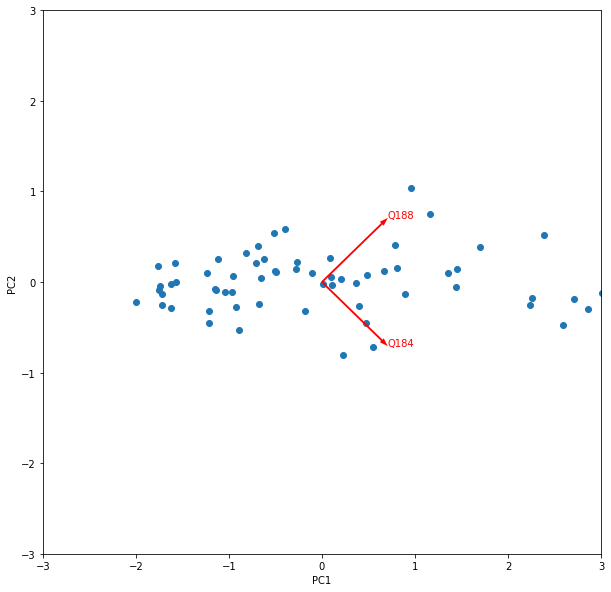

In [105]:
plt.figure(figsize = [10,10])
plt.scatter(scores[:,0], scores[:,1])
plt.arrow(0,0,loadings[0,0], loadings[1,0], color = 'red',  width=0.02, ec='none',
              length_includes_head=True)
plt.text(loadings[0,0], loadings[1,0], 'Q184', color = 'red')
plt.arrow(0,0,loadings[0,1], loadings[1,1], color = 'red',  width=0.02, ec='none',
              length_includes_head=True)
plt.text(loadings[0,1], loadings[1,1], 'Q188', color = 'red')
#plt.scatter(loadings[0,:], loadings[1,:])
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Factor analysis via PCA approximation

Remember that FA is performed under the assumption that the observed data is generated out of some hidden dimensions. In other words, we need some theories about how the data is generated. Here, I am using the 10 variables given in Inglehard and Baker (2000). The study posits that those 10 variables are generated out of 2 hidden dimensions. 

In [259]:
v1 = country_data['Q164']
v1.name = 'God is very important'
v3 = -country_data['Q184']
v3.name = 'Abortion is never justifiable'
v4 = country_data['Q254P']
v4.name = 'Respondent has strong sense of national pride'
v5 = country_data['Q45P']
v5.name = 'Respondent favors more respect for authority'
v7 = -country_data['Q46P']
v7.name = 'Respondent describes self as not very happy'
v8 = -country_data['Q209P']
v8.name = 'Respondent has not signed and would not sign a petition'
v9 = -country_data['Q182']
v9.name = 'Homosexuality is never justified'
v10 = -country_data['Q57P']
v10.name = 'You have to be very careful about trusting people'

In [260]:
v2 = country_data['Q15P'] + country_data['Q17P'] - country_data['Q8P'] - country_data['Q14P']
v2.name = 'It is more important for a child to learn obedience and religious faith than independence and determinations'

In [261]:
v6 =  - (country_data['Q152'] + country_data['Q153'])
v6.name = 'Respondent gives priority to economic and physical security over self-expression and quality-of-life'

In [262]:
X = pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10], axis = 1)
X1 = X.loc[X.isna().sum(axis = 1) == 0]

In [263]:
X.to_csv('WVS_country_opinion_10.csv')

Let's first perform PCA on those 10 variables.

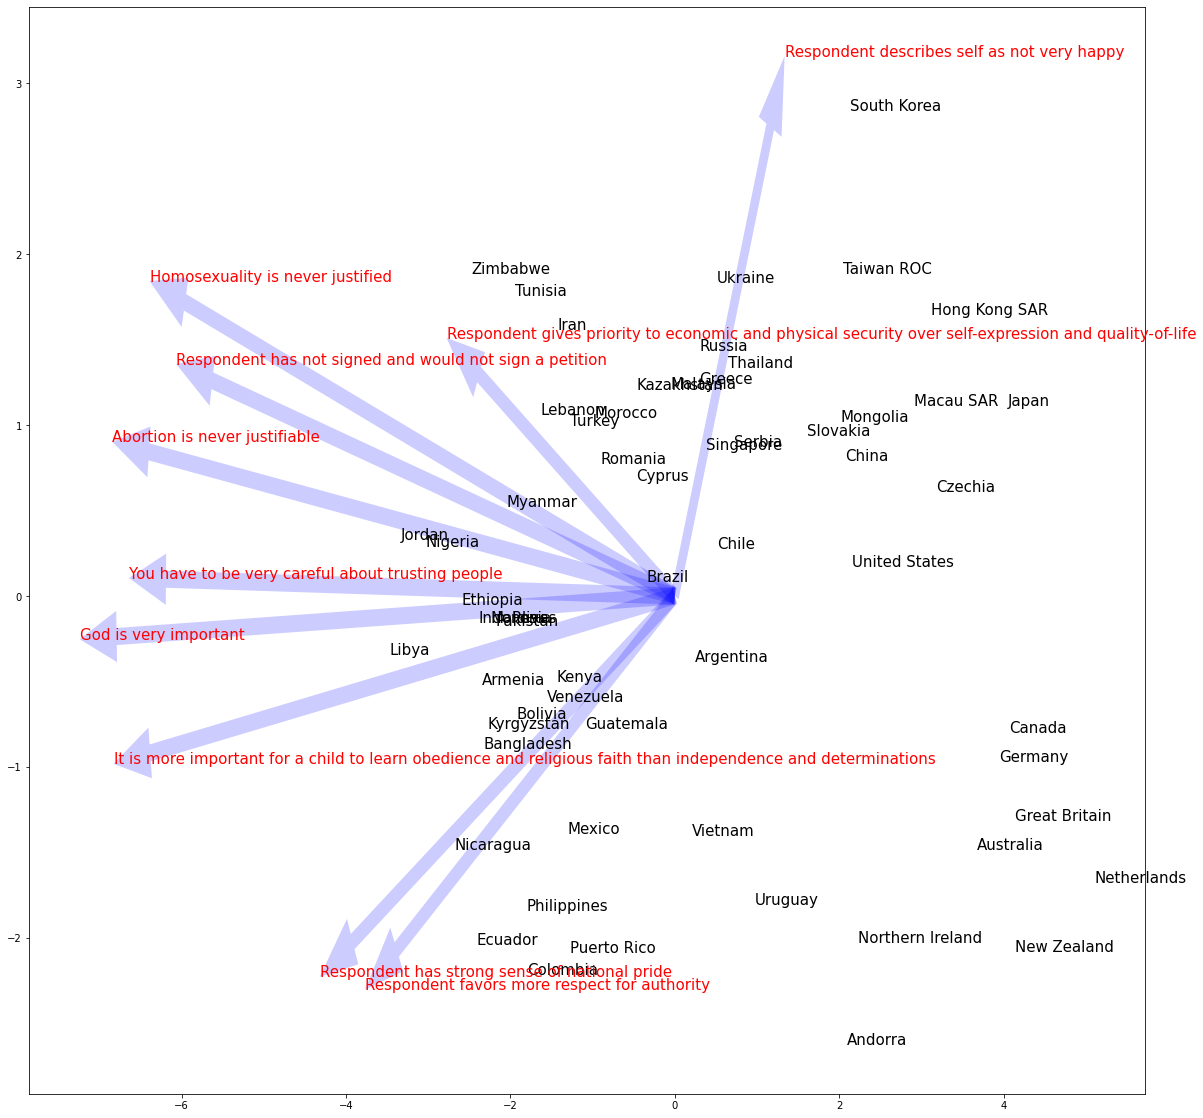

In [264]:
X1_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X1)
model = PCA(svd_solver = 'full')
scores = model.fit_transform(X1_ctd_std)
loadings = model.components_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 1)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[0,:]
y2_var = loadings[1,:]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Scree plot

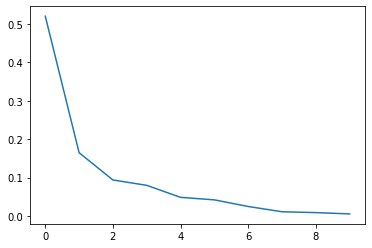

In [265]:
s = model.singular_values_
eigenvalues = s ** 2 / (X1_ctd_std.shape[0])
plt.plot(eigenvalues/eigenvalues.sum())

Then, let's try to apply FA to the selected data.

Before performing FA, a useful statistics that is always worth looking at is the Kaiser–Meyer–Olkin (KMO) test statistics:

$KMO = \frac{\displaystyle \underset{j\neq k}{\sum\sum} r_{jk}^2}{\displaystyle \underset{j\neq k}{\sum\sum} r_{jk}^2+\underset{j\neq k}{\sum\sum} p_{jk}^2}$

[It measures the proportion of variance among variables that might be common variance. The higher the proportion, the higher the KMO-value, the more suited the data is to factor analysis.](https://en.wikipedia.org/wiki/Kaiser%E2%80%93Meyer%E2%80%93Olkin_test)

In [271]:
kmo_all,kmo_model=calculate_kmo(X1_ctd_std)
print(kmo_model)

0.7918347947318778


The overall KMO of this selected dataset is 0.79, which is considered good. 

Next, we perform FA on this dataset without rotation. It should yield exactly the same ouput that PCA produces. Note that there are other FA approaches that do not employ PCA. For instance, the Maximum Likelihood method is very popular (probably more popular than PCA) among FA users. In most scenarios, other approximation methods would produce similar but not identical results. 

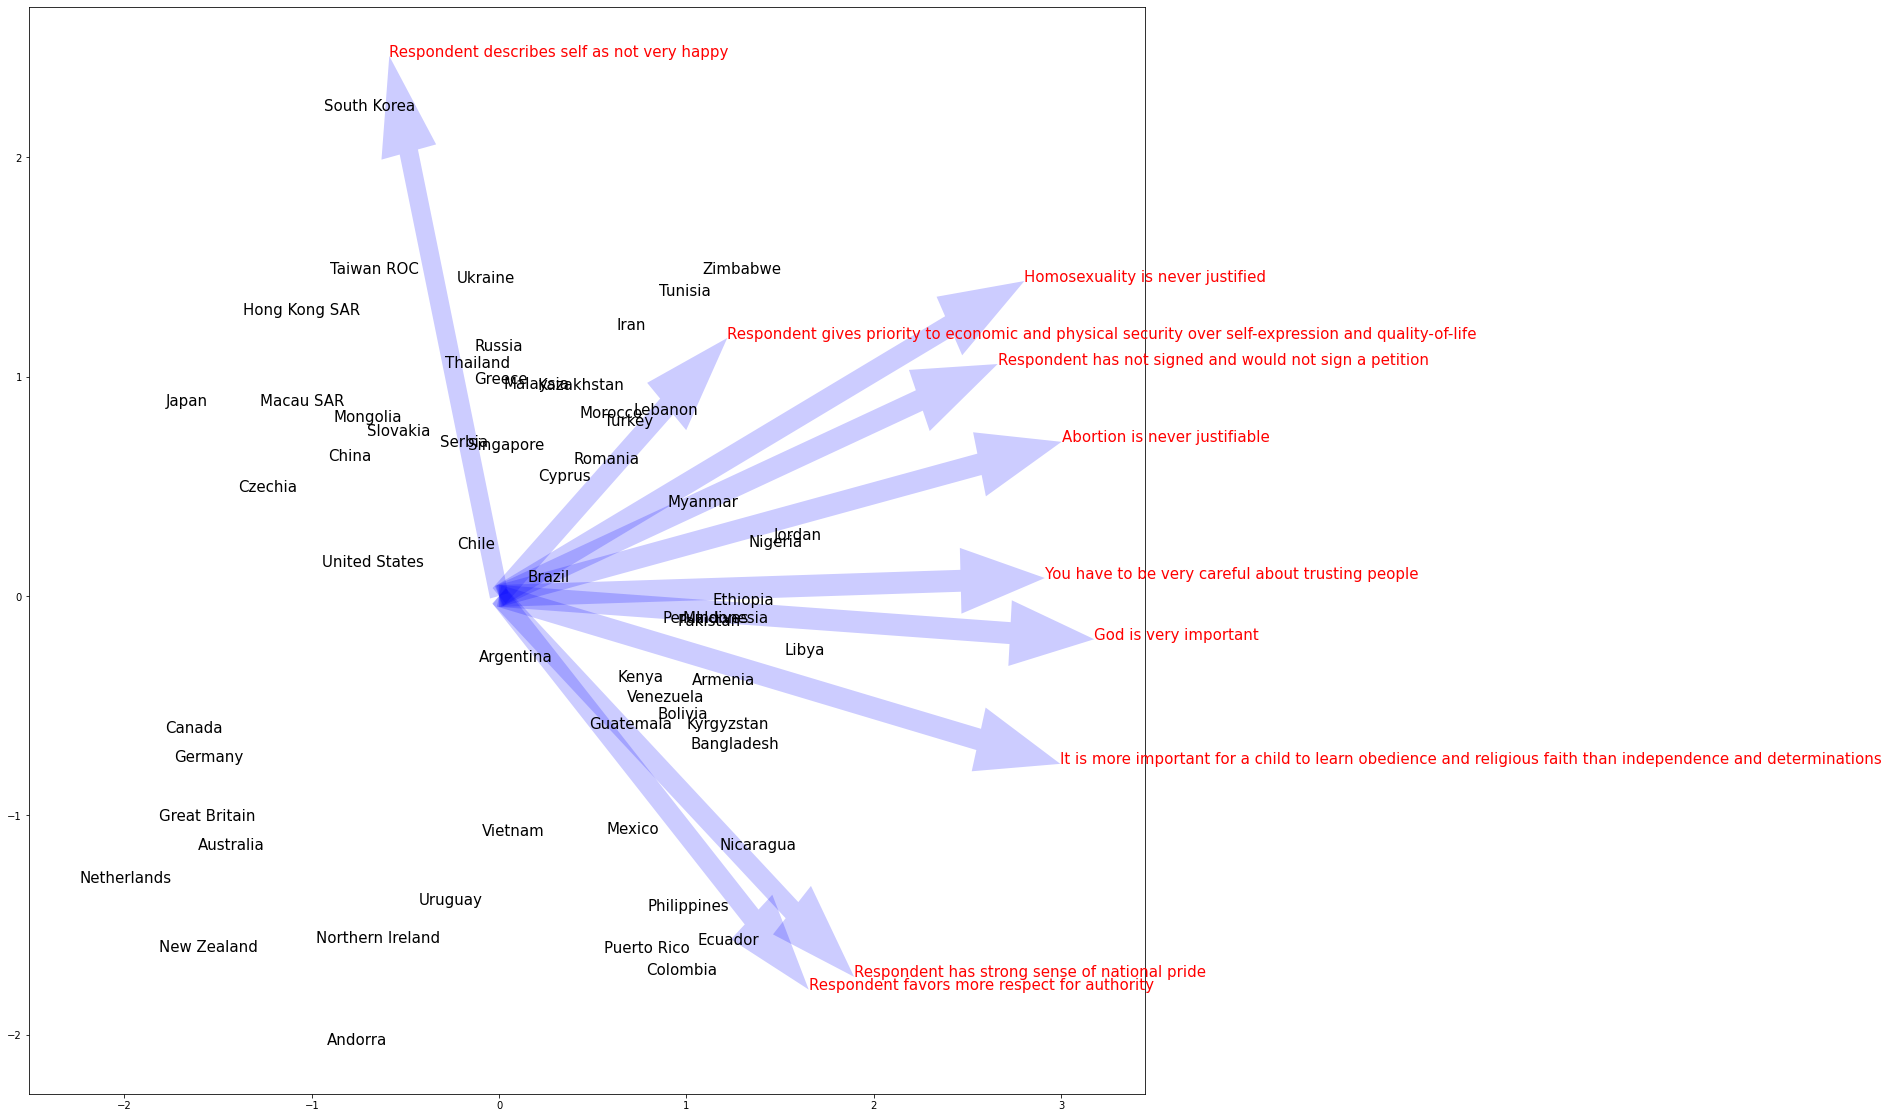

In [272]:
fa = FactorAnalyzer(2, rotation=None, method = 'principal', svd_method = 'lapack')
scores = fa.fit_transform(X1_ctd_std)
loadings = fa.loadings_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 0)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[:,0]
y2_var = loadings[:,1]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Next, let's try to apply an orgothonal rotation (varimax) to the reduced space. Here, I am assuming that dimensionality of the reduced space should be 2 based on Ingleheart's theory. If you specifiy a dimension dimension number, varimax will produce a different result. 

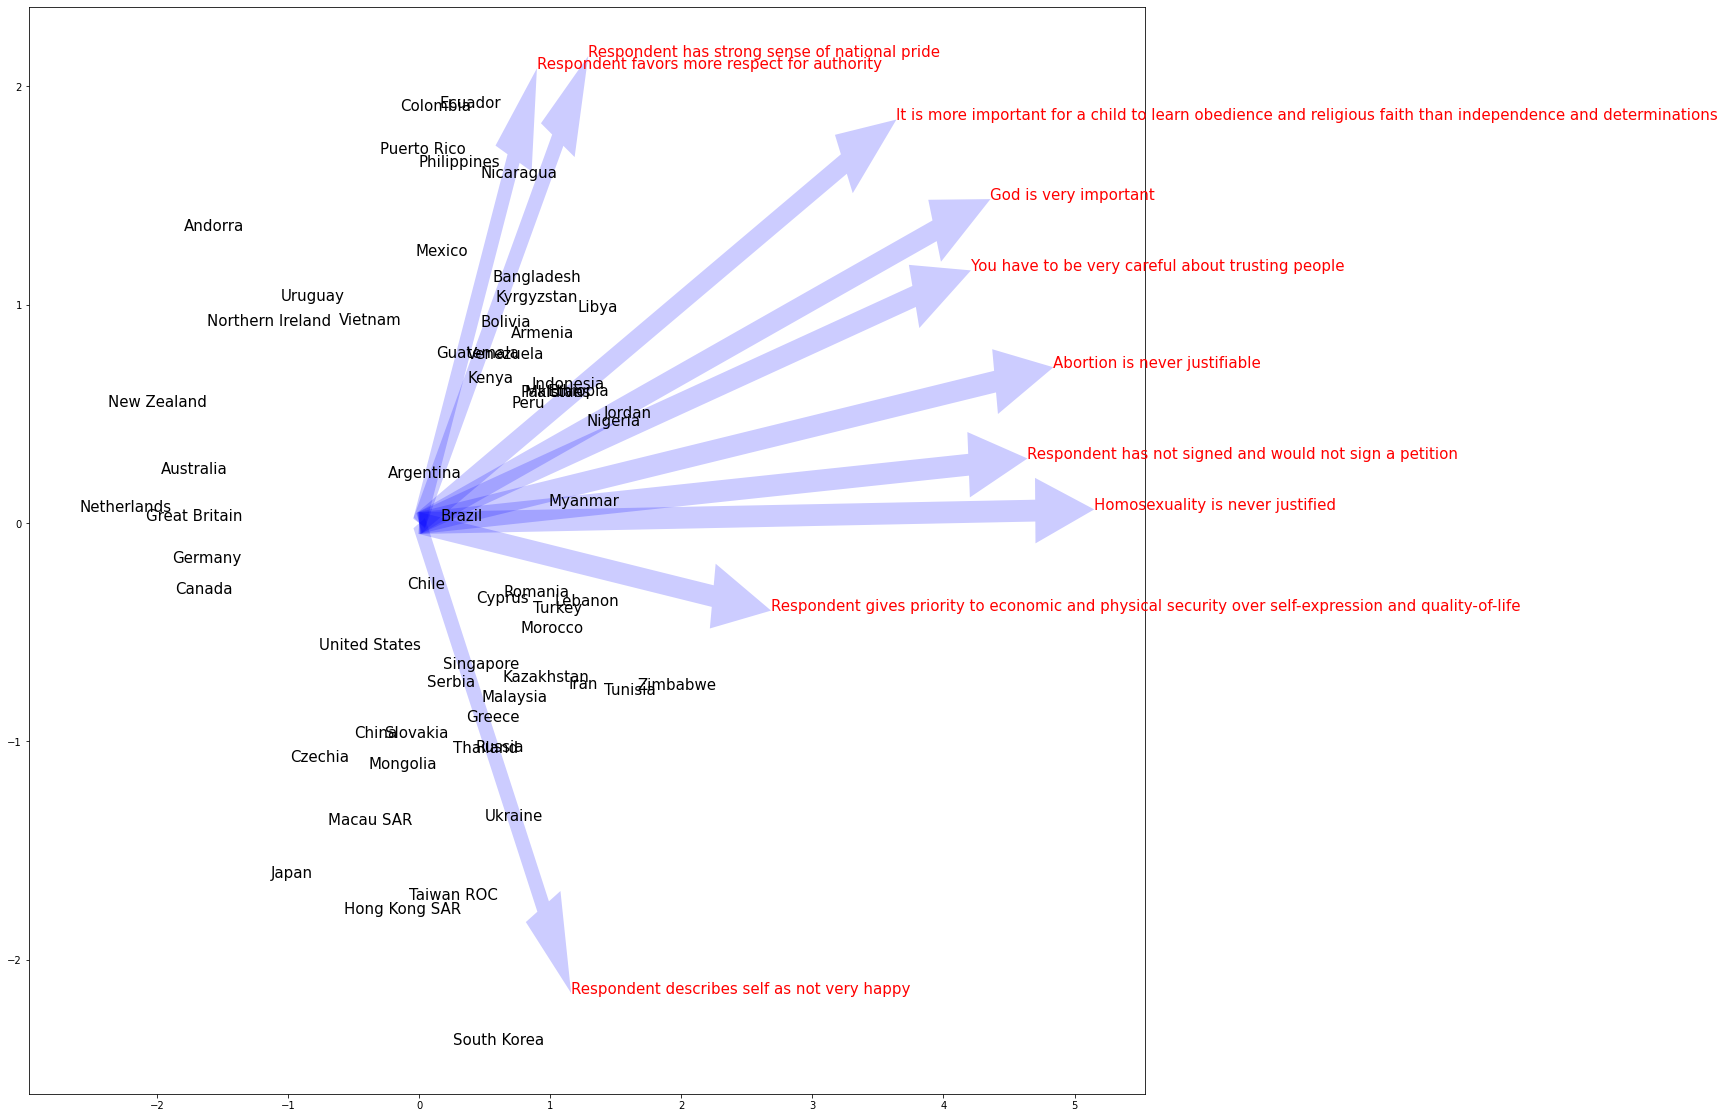

In [273]:
fa = FactorAnalyzer(2, rotation = 'varimax', method = 'principal')
scores = fa.fit_transform(X1_ctd_std)
loadings = fa.loadings_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 0)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[:,0]
y2_var = loadings[:,1]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Let's take a look at the rotation matrix. It is an orthogonal matrix. 

In [274]:
fa.rotation_matrix_

array([[ 0.87443578,  0.48514128],
       [-0.48514128,  0.87443578]])

Then, let's try an oblique method (quartmin).

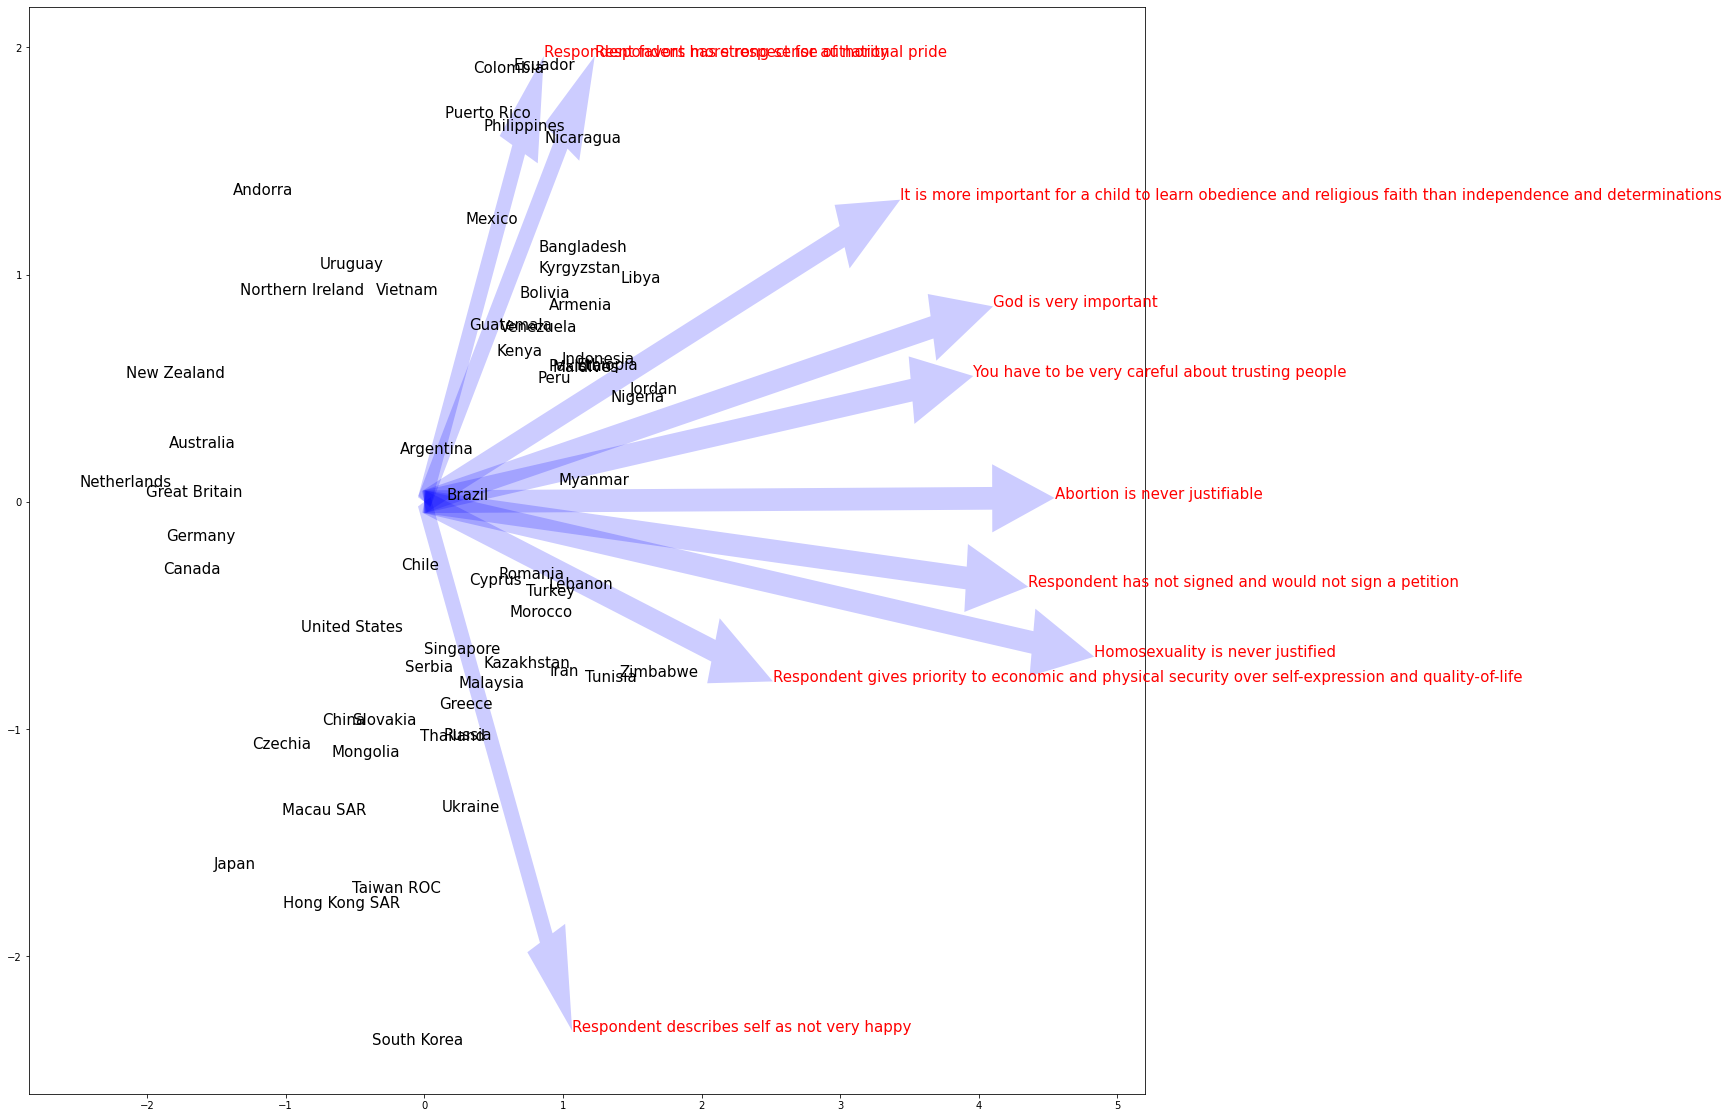

In [275]:
fa = FactorAnalyzer(2, rotation = 'quartimin', method = 'principal')
scores = fa.fit_transform(X1_ctd_std)
loadings = fa.loadings_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 0)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[:,0]
y2_var = loadings[:,1]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Its' rotation matrix is not orthogonal.

In [276]:
fa.rotation_matrix_

array([[ 0.90739049,  0.24760142],
       [-0.49716449,  1.00460121]])

After inspecting the KMO of each variable, the item "Respondent describes self as not very happy" looks very suspicious due to its very low KMO score. The low score indicates that this item shouldn't be explained by a common factor. 

In [277]:
kmo_all

array([0.80614084, 0.83983673, 0.84471026, 0.85304432, 0.73930006,
       0.75581197, 0.38663531, 0.8262375 , 0.74246946, 0.79998348])

In the next round, I decide to drop it. 

In [278]:
X = pd.concat([v1,v2,v3,v4,v5,v6,v8,v9,v10], axis = 1)
X1 = X.loc[X.isna().sum(axis = 1) == 0]

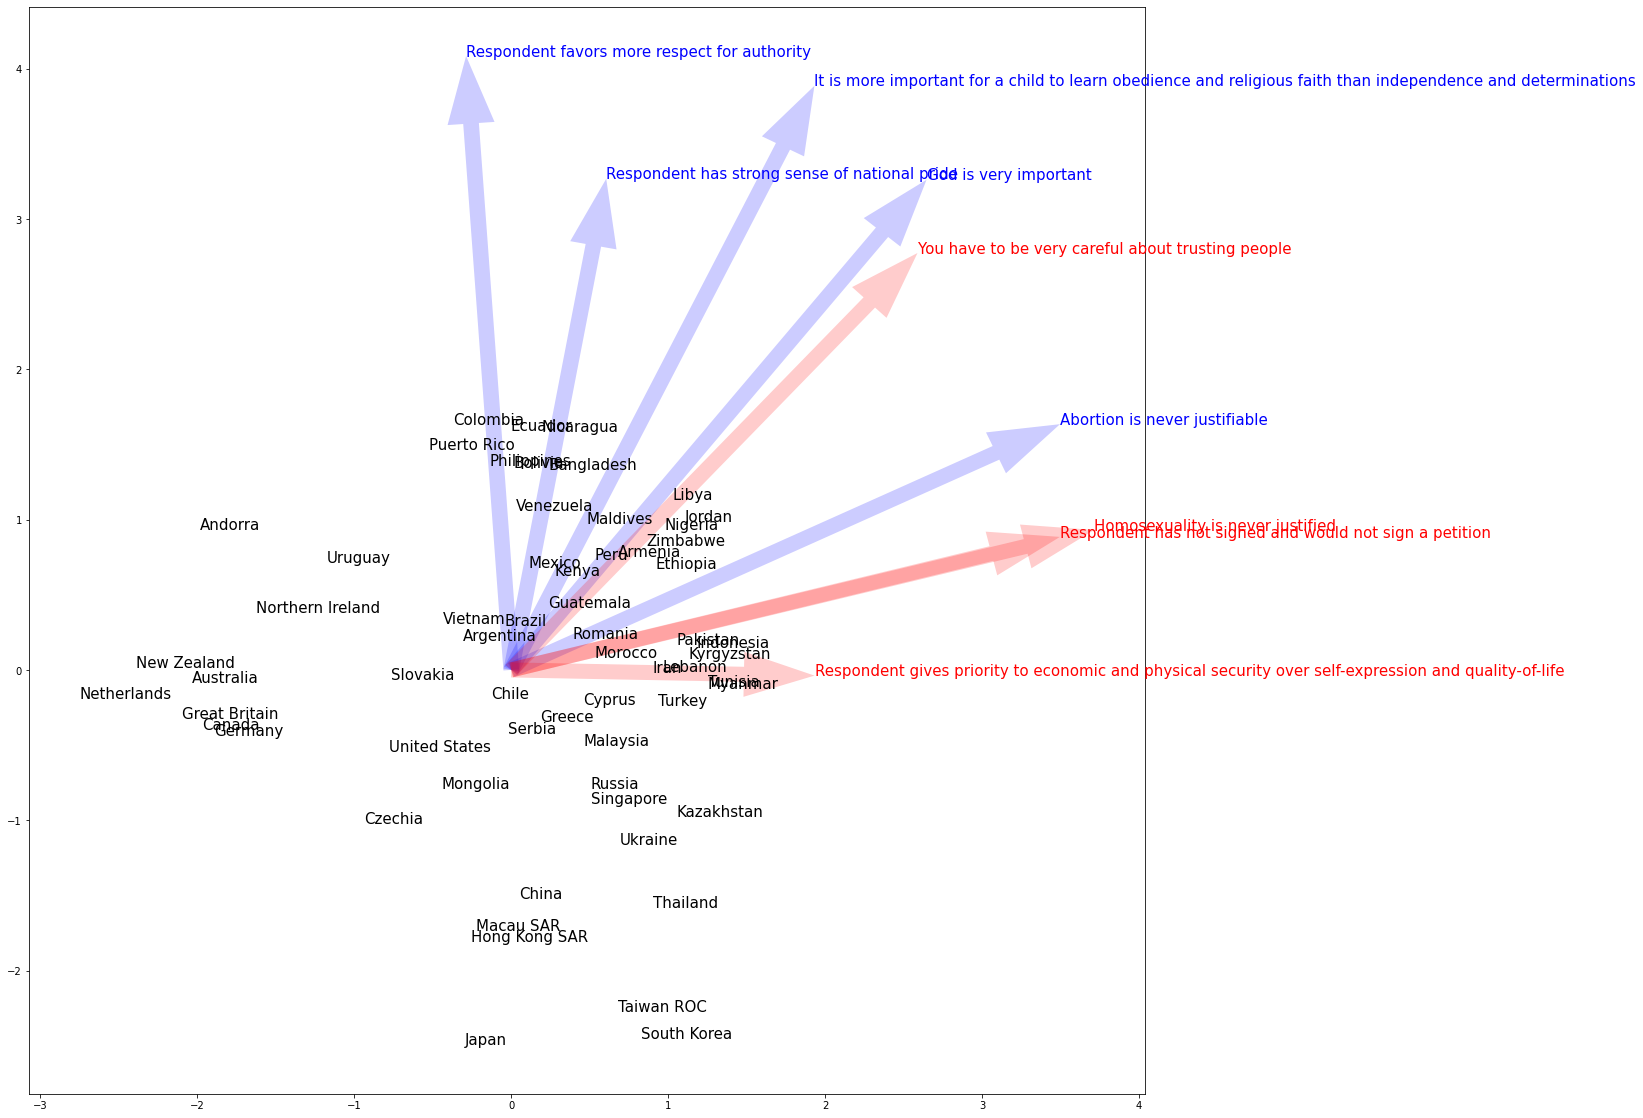

In [279]:
X1_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X1)
fa = FactorAnalyzer(2, rotation = 'varimax', method = 'principal')
scores = fa.fit_transform(X1_ctd_std)
loadings = fa.loadings_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 0)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[:,0]
y2_var = loadings[:,1]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    if i <= 4:
        color = 'blue'
    else:
        color = 'red'
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color=color, alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = color)
plt.show()

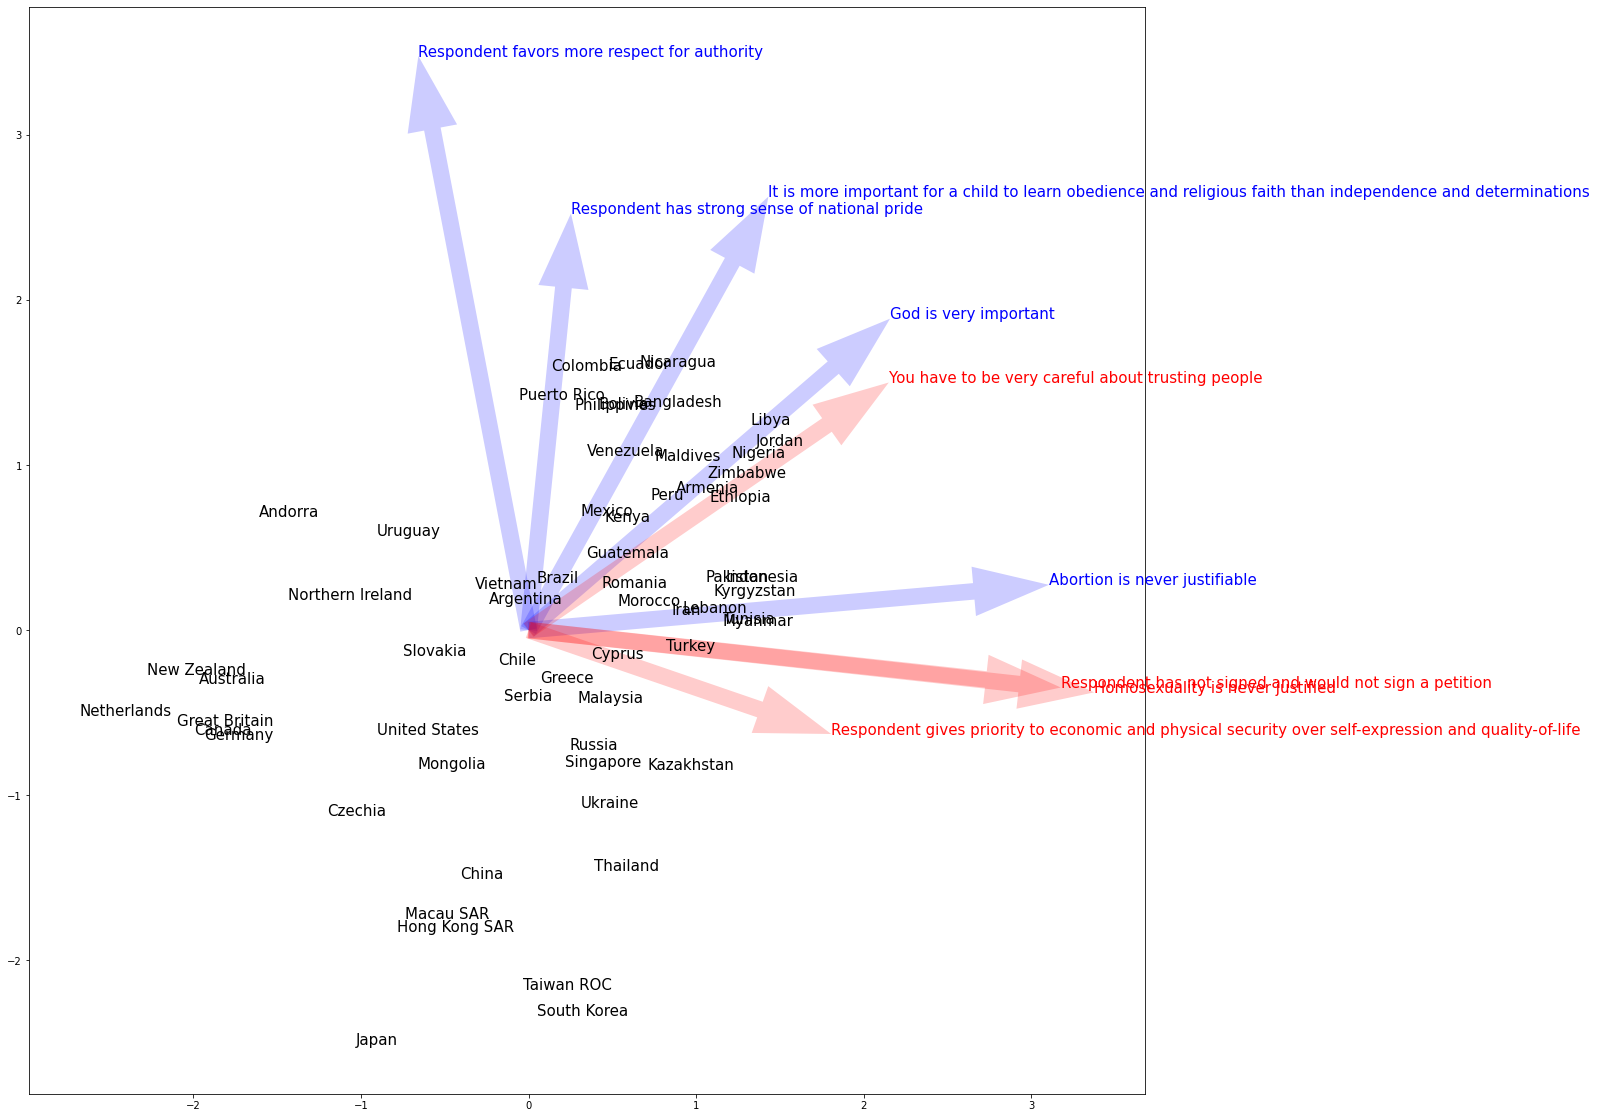

In [280]:
X1_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X1)
fa = FactorAnalyzer(2, rotation = 'quartimin', method = 'principal')
scores = fa.fit_transform(X1_ctd_std)
loadings = fa.loadings_
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 0)
y1 = scores[:,0]
y2 = scores[:,1]
y1_var = loadings[:,0]
y2_var = loadings[:,1]
fig = plt.figure(figsize = [20,20])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(X1.index):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X1.columns):
    if i <= 4:
        color = 'blue'
    else:
        color = 'red'
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color=color, alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = color)
plt.show()

The results look much better. A 2-dimensional structure seems to emerge. However, it seems that the factor loadings based on the 2017 survey is not completely consistent with Ingleheart's earlier models. The world perhaps has changed a lot. 